In [1]:
import sys
parentdir = ".."
sys.path.insert(0, parentdir)

import requests
from os import path
from tqdm.notebook import tqdm
import pandas as pd
import time

from metrics.WebResource import WebResource
from metrics.FAIRMetricsFactory import FAIRMetricsFactory
from metrics.AbstractFAIRMetrics import AbstractFAIRMetrics

[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 100.0.4896
[WDM] - Get LATEST driver version for 100.0.4896
[WDM] - Driver [/Users/gaignard-a/.wdm/drivers/chromedriver/mac64/100.0.4896.60/chromedriver] found in cache


In [2]:
metrics_collection = []
metrics_collection.append(FAIRMetricsFactory.get_F1A(None))
metrics_collection.append(FAIRMetricsFactory.get_F1B(None))
metrics_collection.append(FAIRMetricsFactory.get_F2A(None))
#metrics_collection.append(FAIRMetricsFactory.get_F2B_weak(None))
metrics_collection.append(FAIRMetricsFactory.get_I1A(None))
metrics_collection.append(FAIRMetricsFactory.get_I1B(None))
metrics_collection.append(FAIRMetricsFactory.get_I2A(None))
metrics_collection.append(FAIRMetricsFactory.get_I2B(None))
metrics_collection.append(FAIRMetricsFactory.get_I3(None))
metrics_collection.append(FAIRMetricsFactory.get_R11(None))
metrics_collection.append(FAIRMetricsFactory.get_R12(None))
#metrics_collection.append(FAIRMetricsFactory.get_R13(None))

df_columns = ['ID']
for m in metrics_collection:
    #print(m.get_principle_tag())
    df_columns.append(m.get_principle_tag())
    

In [3]:
exec_time_df = pd.DataFrame(columns=df_columns)

In [4]:
import glob

all_files = glob.glob("./FC_results_split_*.csv")

li = []

for filename in tqdm(all_files):
    print(filename)
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)

  0%|          | 0/26 [00:00<?, ?it/s]

./FC_results_split_18.ttl.csv
./FC_results_split_11.ttl.csv
./FC_results_split_6.ttl.csv
./FC_results_split_7.ttl.csv
./FC_results_split_10.ttl.csv
./FC_results_split_19.ttl.csv
./FC_results_split_5.ttl.csv
./FC_results_split_12.ttl.csv
./FC_results_split_24.ttl.csv
./FC_results_split_25.ttl.csv
./FC_results_split_13.ttl.csv
./FC_results_split_4.ttl.csv
./FC_results_split_16.ttl.csv
./FC_results_split_1.ttl.csv
./FC_results_split_20.ttl.csv
./FC_results_split_8.ttl.csv
./FC_results_split_21.ttl.csv
./FC_results_split_9.ttl.csv
./FC_results_split_0.ttl.csv
./FC_results_split_17.ttl.csv
./FC_results_split_23.ttl.csv
./FC_results_split_2.ttl.csv
./FC_results_split_15.ttl.csv
./FC_results_split_14.ttl.csv
./FC_results_split_3.ttl.csv
./FC_results_split_22.ttl.csv


In [5]:
from upsetplot import generate_counts, generate_samples, UpSet,plot
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200 

In [6]:
from upsetplot import from_contents

F1B = df[((df["F1B"].astype(int) > 0))]["ID"]
F2A = df[((df["F2A"].astype(int) > 0))]["ID"]
#F2B = df[((df["F2B"].astype(int) > 0))]["ID"]

I1A = df[((df["I1A"].astype(int) > 0))]["ID"]
I1B = df[((df["I1B"].astype(int) > 0))]["ID"]

I2A = df[((df["I2A"].astype(int) > 0))]["ID"]
I2B = df[((df["I2B"].astype(int) > 0))]["ID"]

I3 = df[((df["I3"].astype(int) > 0))]["ID"]

R11 = df[((df["R1.1"].astype(int) > 0))]["ID"]
R12 = df[((df["R1.2"].astype(int) > 0))]["ID"]
#R13 = df[((df["R1.3"].astype(int) > 0))]["ID"]

df_upset = from_contents({'F1B': F1B, 
                          'F2A': F2A, 
#                          'F2B*': F2B,
                          'I1A': I1A, 
                          'I1B': I1B,
                          'I2A': I2A, 
                          'I2B': I2B,
                          'I3': I3, 
                          'R11': R11, 
                          'R12': R12,})
#                          'R13*': R13})
df_upset

id
F1B   F2A  I1A  I1B  I2A   I2B  I3    R11   R12                                                 
True  True True True False True True  False False               https://bio.tools/16s_classifier
                                            False                   https://bio.tools/2019ncovas
                                      True  False                     https://bio.tools/2dimpute
                                      False False                      https://bio.tools/2kplus2
                                            False                       https://bio.tools/3diana
...                                                                                          ...
False True True True False True True  False False                         https://bio.tools/wesa
                                            False                       https://bio.tools/wglink
                                False False False  https://bio.tools/whole_genome_snp_genotyping
                                True  True  False                       https://bio.tools/x-mate
                                      False False                        https://bio.tools/xmipp

[25048 rows x 1 columns]

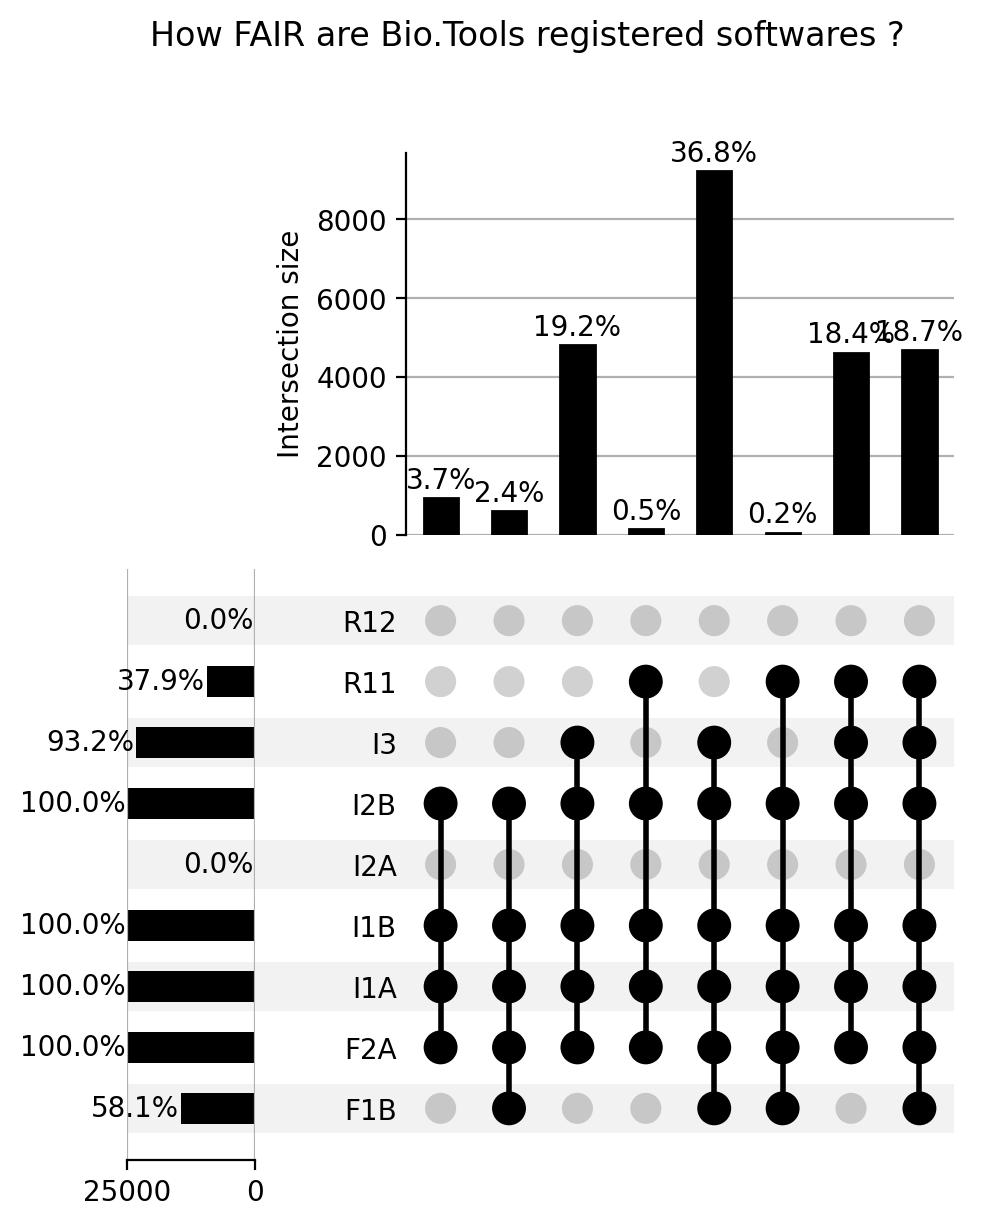

In [15]:
#upset = UpSet(df_upset, subset_size='count', show_counts=True, sort_categories_by=None, orientation='horizontal')
upset = UpSet(df_upset, subset_size='count', sort_categories_by=None, orientation='horizontal', show_percentages=True)
#upset.style_subsets(present=["with_exome", "with_images"],
#                    facecolor="red")

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200 

params = {'legend.fontsize': 8}
with plt.rc_context(params):
    upset.plot()
plt.suptitle("How FAIR are Bio.Tools registered softwares ?")
plt.savefig('biotools-no-F2B-no-R13.png', format="png")
plt.show()




TypeError: plot() got an unexpected keyword argument 'element_size'

<Figure size 2000x600 with 0 Axes>

In [15]:
import seaborn as sns

exec_time_df.drop('ID', 1, inplace=True)

/var/folders/x1/d1nyvpvs0td0htxzsv9x6ggw0000gn/T/ipykernel_51501/2327644556.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  exec_time_df.drop('ID', 1, inplace=True)


<AxesSubplot:>

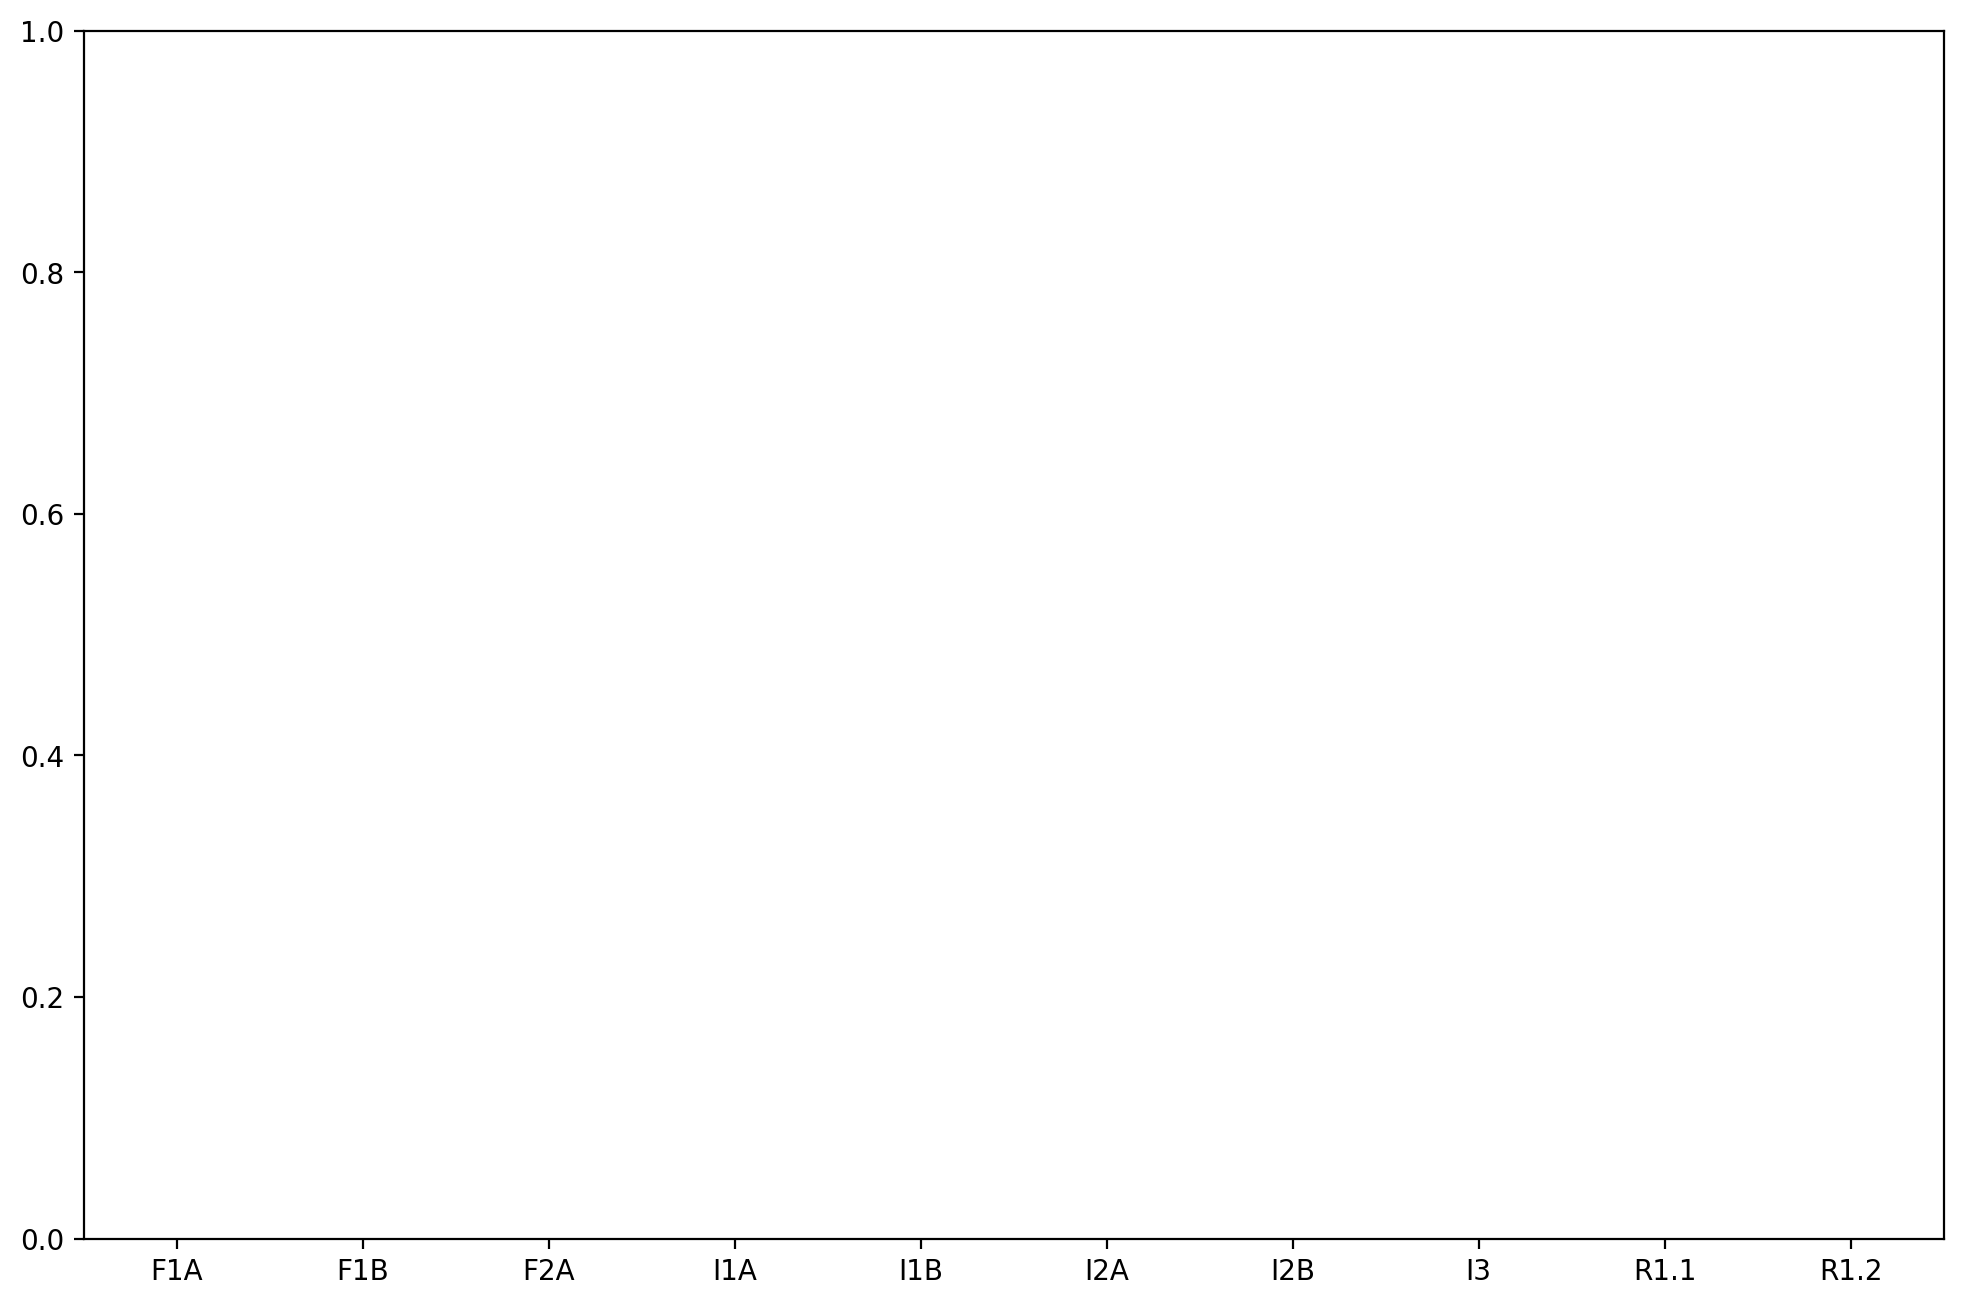

In [17]:
sns.boxplot(data=exec_time_df)

In [18]:
plt.savefig('exec_time.png')

<Figure size 2400x1600 with 0 Axes>

In [ ]:
#%prun -s cumulative -s module evals, exec_time = mass_eval()    

In [ ]:
#%load_ext memory_profiler
#%mprun -T mprof0 evals, exec_time = mass_eval()  

In [ ]:
#from guppy import hpy; h=hpy()

In [ ]:
#h.heap()

In [ ]:
#%load_ext watermark
#%watermark -v -m -g

In [ ]:
#%load_ext cython
#%load_ext line_profiler


In [ ]:
#%lprun -f m.evaluate mass_eval()